# **1. Importing Library and Dataset**
Heart Failure Prediction

Sumber: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [196]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
import pandas as pd
import numpy as np

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [197]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [199]:
df.isnull().sum().sum()

0

# **2. EDA and visualization**

### --Menganalisis data Age dan Sex sebagai indikator Death event--

In [200]:
# age distribution

hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* Usia 40 hingga 80 penyebarannya Tinggi
* Usia kurang dari 40 dan usia lebih dari 80 orang sangat rendah

In [201]:
fig = px.box(df, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [202]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis kelangsungan hidup - data Gender")
fig.show()

### --Menganalisis data Gender sebagai indikator Death event--

In [203]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis pada data Age terhadap status kelangsungan hidup")
fig.show()

* Kelangsungan hidup tinggi pada 40 hingga 70
* Penyebaran Tidak bertahan hidup melewati segala usia.

In [204]:
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analisis pada data  Age dan Gender pada status kelangsungan hidup")
fig.show()

Laporan Usia

* Penyebaran kelangsungan hidup tinggi pada aliran usia 40 hingga 70 tahun
* Kelangsungan hidup tinggi untuk laki-laki antara 50 hingga 60 tahun dan usia perempuan antara 60 hingga 70 tahun

In [205]:
fig = px.violin(df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analisis pada data Age dan Smoking pada status kelangsungan hidup")
fig.show()

* Survival tinggi untuk orang yang tidak merokok 55 hingga 65, sedangkan untuk orang yang merokok antara 50 hingga 60
* Kejadian kematian bagi orang yang merokok lebih tinggi daripada orang yang tidak merokok

In [206]:
fig = px.violin(df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analisis pada data Age and Diabetes pada status kelangsungan hidup")
fig.show()

### --Menganalisis faktor lain sebagai indikator Death event--

In [207]:
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [208]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [209]:
fig = px.histogram(df, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [210]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [211]:
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=df.columns)
fig.show()

**Distribution plots Selamat and Kematian**

In [212]:
surv = df[df['DEATH_EVENT']==0]['serum_sodium']
not_surv = df[df['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Selamat', 'Kematian']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis Sodium Serum pada Status Kelangsungan Hidup")
fig.show()

In [213]:
surv = df[df['DEATH_EVENT']==0]['serum_creatinine']
not_surv = df[df['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Selamat', 'Kematian']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis Kreatinin Serum pada Status Kelangsungan Hidup")
fig.show()

In [214]:
surv = df[df['DEATH_EVENT']==0]['ejection_fraction']
not_surv = df[df['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Selamat', 'Kematian']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analisis data ejactiion fraction (Fraksi Ejeksi) terhadap kelangsungan hidup")
fig.show()

***Pie Charts***

In [215]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis data diabetes")
fig.show()

From the above pie chart we can conclude that in our dataset 58.2% (174) pepole are No Diabetes Person and 41.8% (125) are Diabetes Person.

In [216]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Rasio Kejadian Kematian Diabetes')
fig.show()

In [217]:
diabetes_yes_survi = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(diabetes_yes[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Kelangsungan Hidup - Diabetes")
fig.show()

* Dari diagram lingkaran di atas kita dapat menyimpulkan bahwa dalam dataset diabetes kita dari 174 orang Non Diabetes 118 selamat dan 56 tidak selamat dan
* Dari 125 orang Diabetes 85 selamat, sedangkan 40 tidak selamat.

In [218]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis data Anemia")
fig.show()

From the above pie chart we can conclude that in our dataset 56.9%(170) pepoles are Non anaemic pepoles, while 43.1%(129) are anaemic pepoles.

In [219]:
fig = px.pie(df, values='anaemia',names='DEATH_EVENT', title='Rasio Kejadian Kematian Anemia')
fig.show()

In [220]:
anaemia_yes_survi = anaemia_yes[df["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[df["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[df["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[df["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[df["DEATH_EVENT"]==0]),len(anaemia_yes[df["DEATH_EVENT"]==1]),
         len(anaemia_no[df["DEATH_EVENT"]==0]),len(anaemia_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis Kelangsungan Hidup - Anemia")
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and
* From 129 Anaemic person 83 are survived, while 46 are not survived.

In [221]:
hbp_yes = df[df['high_blood_pressure']==1]
hbp_no = df[df['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis - data High Blood Pressure (BP) (tekanan darah tinggi)")
fig.show()

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [222]:
fig = px.pie(df, values='high_blood_pressure',names='DEATH_EVENT', title='Rasio Peristiwa Kematian Tekanan Darah Tinggi (High Blood Pressure)')
fig.show()

In [223]:
hbp_yes_survi = hbp_yes[df["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[df["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[df["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[df["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[df["DEATH_EVENT"]==0]),len(hbp_yes[df["DEATH_EVENT"]==1]),
         len(hbp_no[df["DEATH_EVENT"]==0]),len(hbp_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis kelangsungan hidup - HBP(high blood pressure)")
fig.show()

* Dari diagram lingkaran di atas kita dapat menyimpulkan bahwa dalam dataset diabetes kita dari 194 orang BP Non Tinggi 137 selamat dan 57 tidak selamat dan
* Dari 105 BP Tinggi 66 orang selamat, sedangkan 39 orang tidak selamat.

In [224]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis - Smoking")
fig.show()

Dari diagram lingkaran di atas kita dapat menyimpulkan bahwa dalam dataset kami 67,9%(203) orang adalah orang yang tidak merokok, sedangkan 32,1%(96) adalah orang yang merokok.

In [225]:
fig = px.pie(df, values='smoking',names='DEATH_EVENT', title='Rasio Kejadian Kematian Merokok')
fig.show()

In [226]:
smoking_yes_survi = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[df["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analisis kelangsungan hidup - Smoking")
fig.show()

* Dari diagram lingkaran di atas kita dapat menyimpulkan bahwa dalam dataset diabetes kita dari 203 orang Non Merokok 137 selamat dan 66 tidak selamat dan
* Dari 96 orang yang merokok 66 selamat, sedangkan 30 tidak selamat.

# **3. Data Preprocessing**

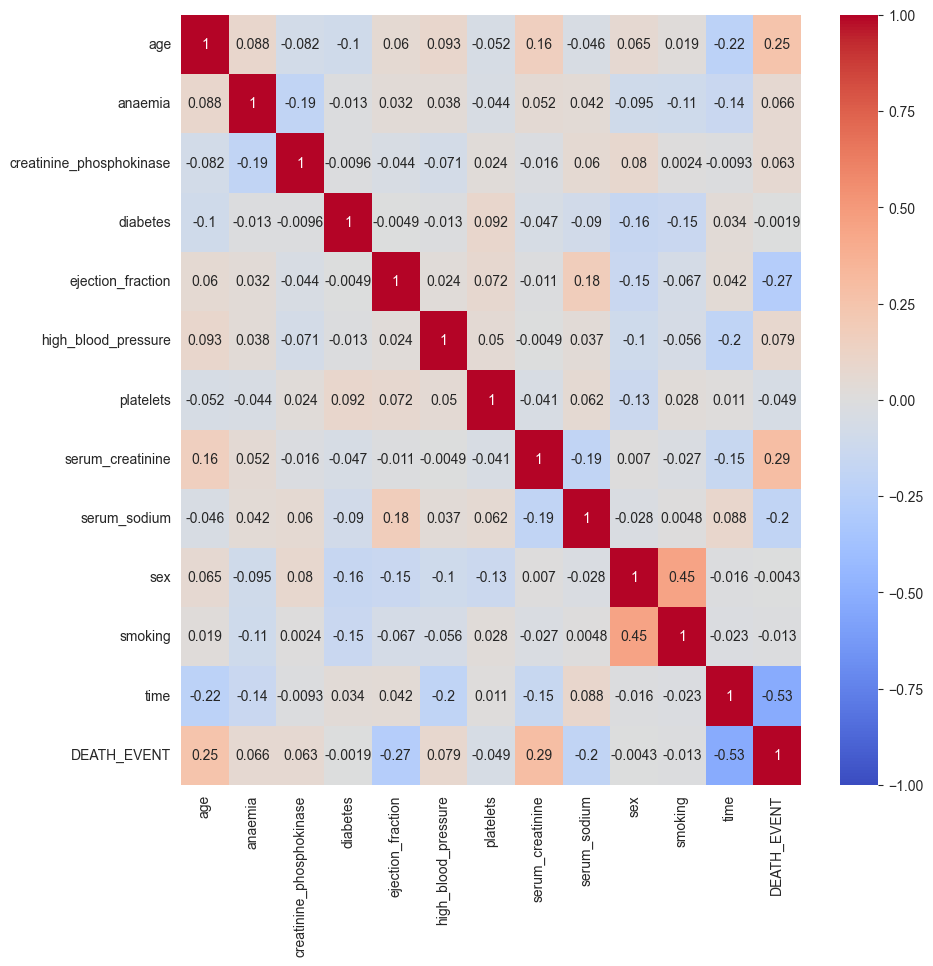

In [227]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [228]:
df["DEATH_EVENT"] = df["DEATH_EVENT"].astype(float)

Q1 = df['DEATH_EVENT'].quantile(0.25)
Q3 = df['DEATH_EVENT'].quantile(0.75)
IQR = Q3 - Q1

LOWER_LIMIT = Q1 - (1.5 * IQR)
UPPER_LIMIT = Q3 + (1.5 * IQR)

outliers_upper = df['DEATH_EVENT'][(df['DEATH_EVENT'] > UPPER_LIMIT)]
outliers_lower = df['DEATH_EVENT'][(df['DEATH_EVENT'] < LOWER_LIMIT)]
jumlah_outlier =  outliers_lower.size + outliers_upper.size
print("Total outlier: ", jumlah_outlier)

Total outlier:  0


Ternyata tidak ada outlier pada data target kita yang nanti akan di modelkan yaitu data Death_Event, kita bisa langsung melanjutkan ke data modelling

# **4. Data Modelling**

In [229]:
Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [230]:
accuracy_list = []

**Random Forest Classifier**

In [231]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [232]:
print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


<Figure size 2000x800 with 0 Axes>

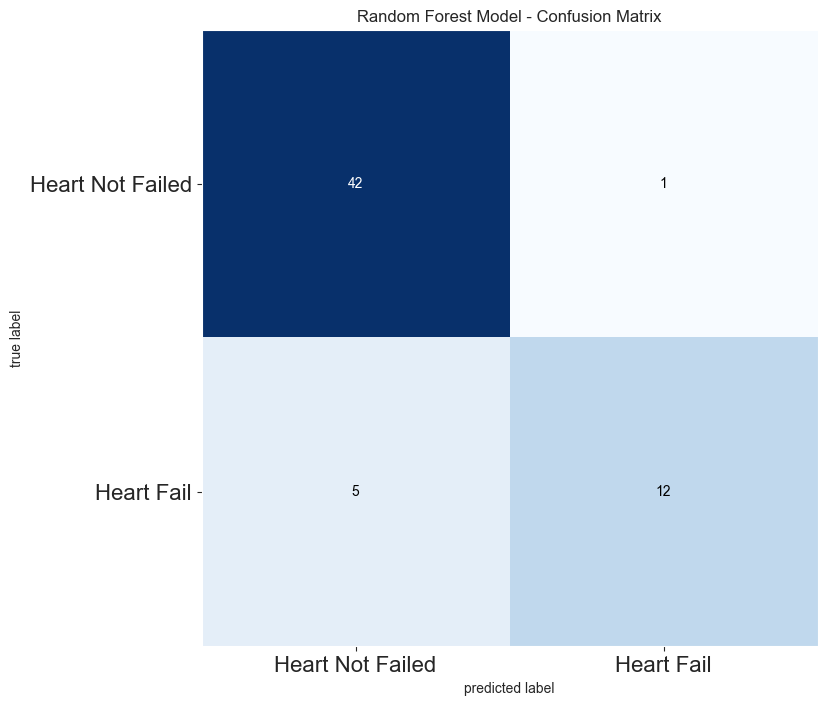

In [233]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Gradient Boosting Classifier**

In [234]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [235]:
print("Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


<Figure size 2000x800 with 0 Axes>

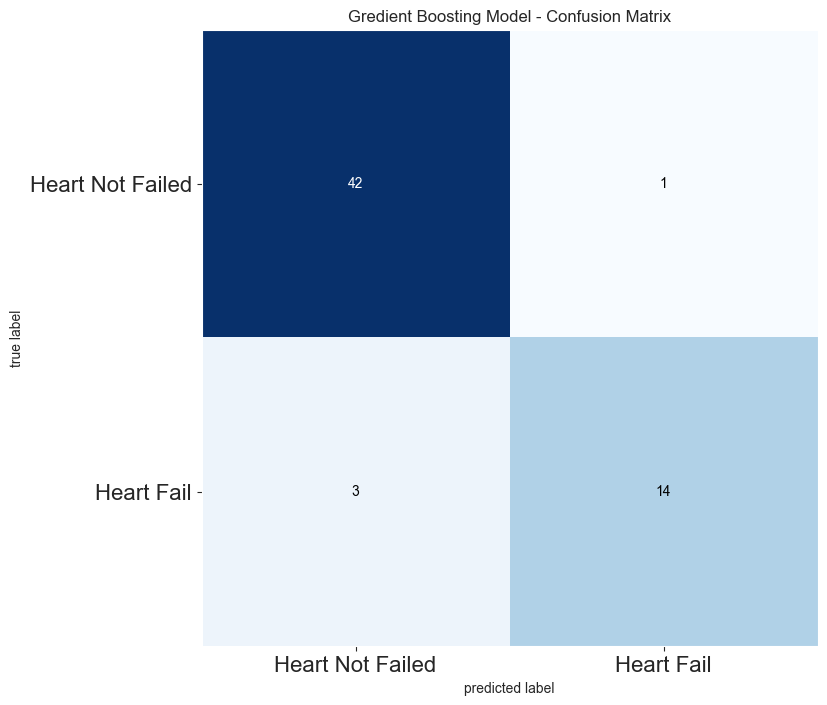

In [236]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Cat Boost Classifier**

In [237]:
# CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.005591
0:	learn: 0.6898089	total: 1.01ms	remaining: 1.01s
1:	learn: 0.6853691	total: 2ms	remaining: 1s
2:	learn: 0.6814224	total: 2.76ms	remaining: 917ms
3:	learn: 0.6763787	total: 3.55ms	remaining: 884ms
4:	learn: 0.6732323	total: 4.41ms	remaining: 877ms
5:	learn: 0.6693704	total: 5.27ms	remaining: 872ms
6:	learn: 0.6649135	total: 6.14ms	remaining: 871ms
7:	learn: 0.6609337	total: 6.92ms	remaining: 858ms
8:	learn: 0.6571249	total: 7.66ms	remaining: 843ms
9:	learn: 0.6521269	total: 8.46ms	remaining: 838ms
10:	learn: 0.6485155	total: 9.11ms	remaining: 819ms
11:	learn: 0.6440567	total: 9.89ms	remaining: 815ms
12:	learn: 0.6409554	total: 10.7ms	remaining: 811ms
13:	learn: 0.6370791	total: 11.4ms	remaining: 803ms
14:	learn: 0.6329117	total: 12.1ms	remaining: 797ms
15:	learn: 0.6288988	total: 12.9ms	remaining: 792ms
16:	learn: 0.6246823	total: 13.7ms	remaining: 790ms
17:	learn: 0.6210250	total: 14.3ms	remaining: 779ms
18:	learn: 0.6177116	total: 15ms	remaining: 773ms


In [238]:
print("Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  91.67%


<Figure size 2000x800 with 0 Axes>

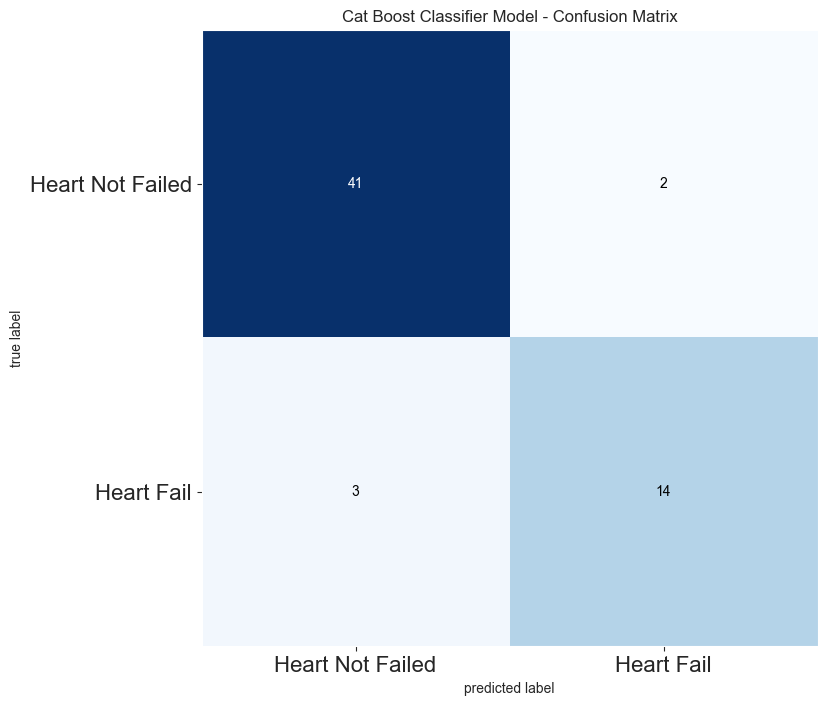

In [239]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [240]:
model_list = ['RandomForest', 'GradientBooster', 'CatBoostClassifier']

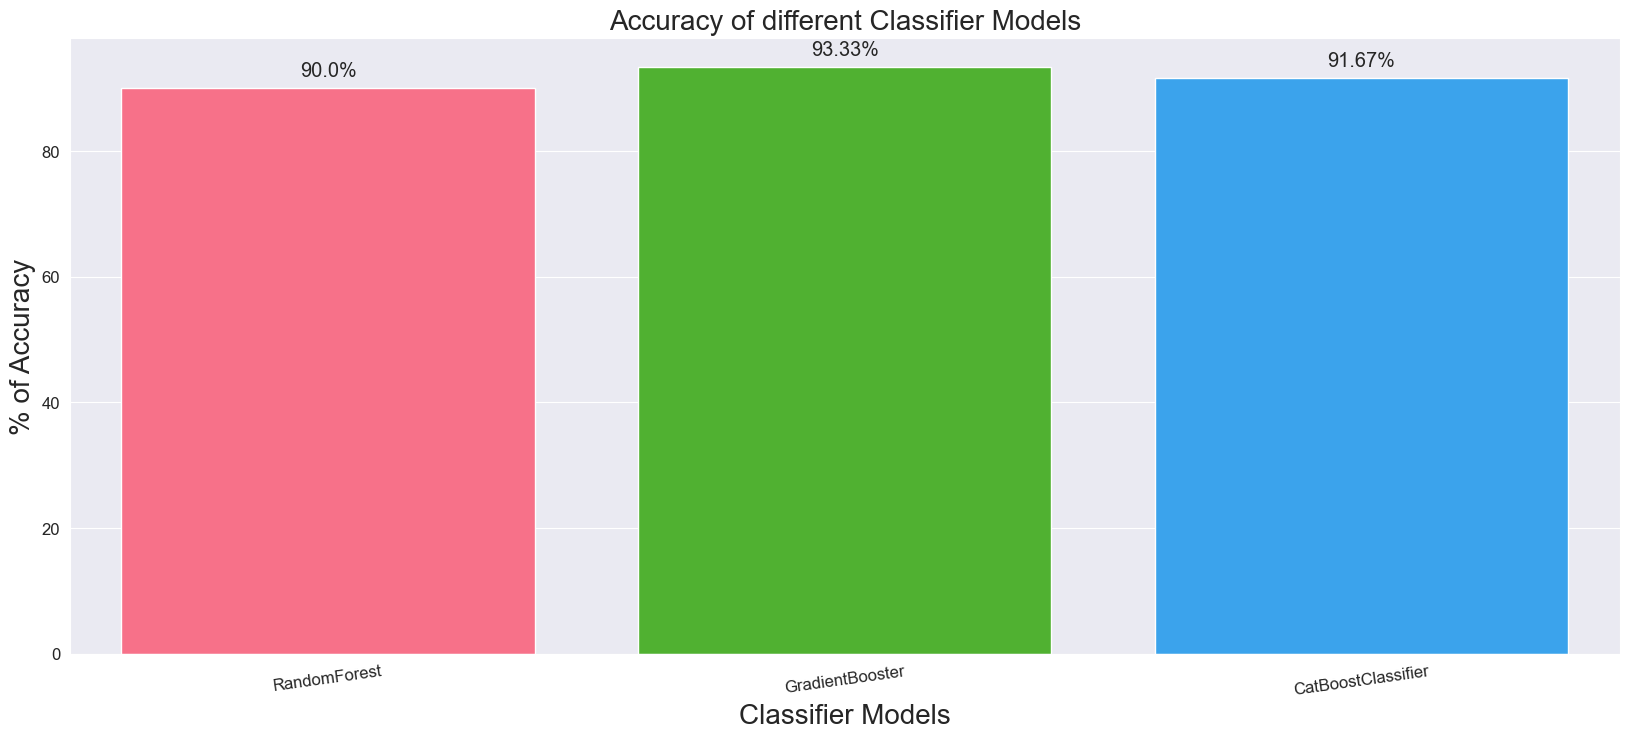

In [241]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()